In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


ModuleNotFoundError: No module named 'seaborn'

In [2]:
today = dt.date.today()
data = yf.download('RELIANCE.NS', start=today,interval='2m')
data = data.dropna()
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-02-03 09:15:00+05:30,2345.949951,2345.949951,2326.500000,2326.550049,2326.550049,203322
2023-02-03 09:17:00+05:30,2328.000000,2329.050049,2318.949951,2321.800049,2321.800049,109881
2023-02-03 09:19:00+05:30,2321.899902,2324.000000,2318.800049,2319.850098,2319.850098,118525
2023-02-03 09:21:00+05:30,2319.600098,2322.500000,2316.800049,2317.199951,2317.199951,75763
2023-02-03 09:23:00+05:30,2317.199951,2318.000000,2313.750000,2317.300049,2317.300049,243676


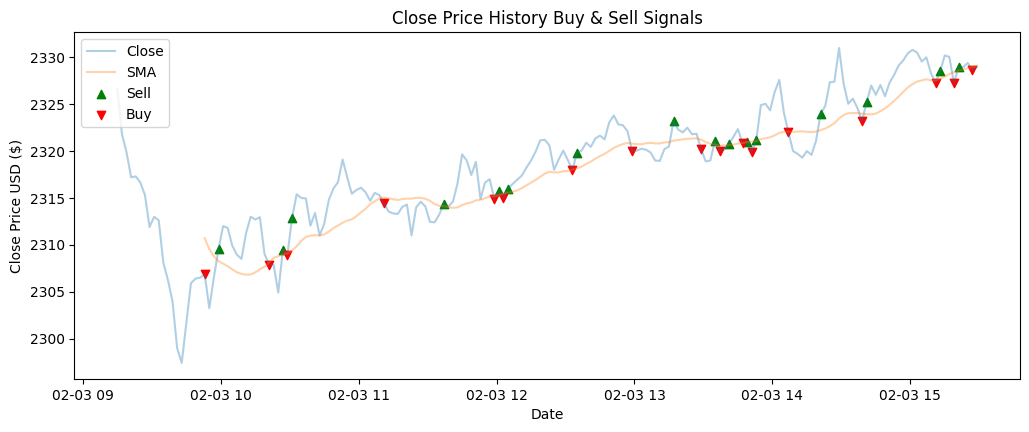

In [8]:
# algorithm to buy and sell stocks
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['Close'][i] > data['SMA'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['Close'][i] < data['SMA'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)


# create a new dataframe
new_df = pd.DataFrame()
new_df['Close'] = data['Close']
new_df['SMA'] = data['Close'].rolling(window=20).mean()
new_df['Buy_Signal_Price'] = buy_sell(new_df)[0]
new_df['Sell_Signal_Price'] = buy_sell(new_df)[1]
new_df


# visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label='Close', alpha=0.35)
plt.plot(new_df['SMA'], label='SMA', alpha=0.35)
plt.scatter(new_df.index, new_df['Buy_Signal_Price'], label='Sell', marker='^', color='green')
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], label='Buy', marker='v', color='red')
plt.title('Close Price History Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [10]:
# predict the sma for the next 30 days
future_days = 30
new_df['Prediction'] = new_df[['Close']].shift(-future_days)
new_df.tail(future_days)

# create the feature data set (X) and convert it to a numpy array and remove the last 'n' rows/days
X = np.array(new_df.drop(['Prediction'], 1))[:-future_days]
print(X)

# create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'n' rows/days
y = np.array(new_df['Prediction'])[:-future_days]
print(y)

# split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# create the models
# create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

# get the last 'n' rows of the feature data set
x_future = new_df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


[[2326.55004883           nan           nan           nan]
 [2321.80004883           nan           nan           nan]
 [2319.85009766           nan           nan           nan]
 [2317.19995117           nan           nan           nan]
 [2317.30004883           nan           nan           nan]
 [2316.64990234           nan           nan           nan]
 [2315.30004883           nan           nan           nan]
 [2311.89990234           nan           nan           nan]
 [2313.                   nan           nan           nan]
 [2312.60009766           nan           nan           nan]
 [2308.10009766           nan           nan           nan]
 [2306.25                 nan           nan           nan]
 [2303.94995117           nan           nan           nan]
 [2299.                   nan           nan           nan]
 [2297.39990234           nan           nan           nan]
 [2301.60009766           nan           nan           nan]
 [2305.89990234           nan           nan           na

/tmp/ipykernel_8273/509706792.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(new_df.drop(['Prediction'], 1))[:-future_days]


NameError: name 'train_test_split' is not defined